In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn import metrics

In [63]:
data = pd.read_csv('car data.csv')
data.head(6)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0


In [64]:
data.shape

(301, 9)

In [65]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [67]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [68]:
print(data.Fuel_Type.value_counts())
print(data.Seller_Type.value_counts())
print(data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [69]:
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}}, inplace = True)
data.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace = True)
data.replace({'Transmission':{'Manual':0,'Automatic':1}}, inplace = True)

In [70]:
data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [71]:
x = data.drop(['Car_Name','Selling_Price'],axis= 1)
y = data['Selling_Price']

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=2)

In [73]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [74]:
error_score = metrics.r2_score

In [75]:
error_score = metrics.r2_score(y_pred, y_test)

In [76]:
print(error_score)

0.8193296211105912


Text(0.5, 1.0, 'actual vs prediction')

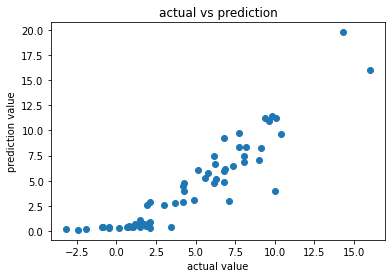

In [78]:
plt.scatter(y_pred, y_test)
plt.xlabel('actual value')
plt.ylabel('prediction value')
plt.title('actual vs prediction')

In [79]:
p = model.predict(x_train)

Text(0.5, 1.0, 'actual vs prediction')

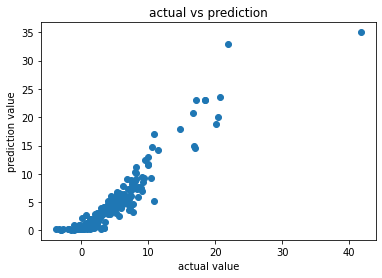

In [81]:
plt.scatter(p, y_train)
plt.xlabel('actual value')
plt.ylabel('prediction value')
plt.title('actual vs prediction')

In [82]:
model.predict([[2014,5.59,27000,0,0,0,0]])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.82765933])

In [83]:
lr = Lasso()
lr.fit(x_train, y_train)

Lasso()

In [85]:
lp = lr.predict(x_train)
es = metrics.r2_score(lp,y_train)

Text(0.5, 1.0, 'actual vs prediction')

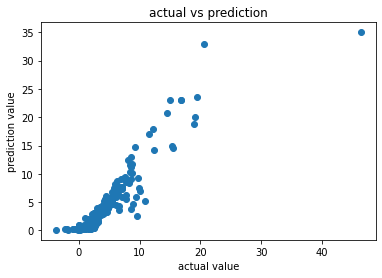

In [86]:
plt.scatter(lp, y_train)
plt.xlabel('actual value')
plt.ylabel('prediction value')
plt.title('actual vs prediction')